In [1]:
#Import
import pandas as pd

In [4]:
#Load data new_york
new_york_tweets = pd.read_json("new_york.json", lines=True)
print(len(new_york_tweets))
print(new_york_tweets.columns)
print(new_york_tweets.loc[12]["text"])

4723
Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'timestamp_ms', 'extended_tweet',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'extended_entities',
       'withheld_in_countries'],
      dtype='object')
Be best #ThursdayThoughts


In [5]:
#Load data london & paris
london_tweets = pd.read_json("london.json", lines=True)
paris_tweets = pd.read_json("paris.json", lines=True)
print(len(london_tweets))
print(len(paris_tweets))

5341
2510


In [8]:
#Naive Bayes Classifier
#language
new_york_text = new_york_tweets["text"].tolist()
london_text = london_tweets["text"].tolist()
paris_text = paris_tweets["text"].tolist()

all_tweets = new_york_text + london_text + paris_text
labels = [0] * len(new_york_text) + [1] * len(london_text) + [2] * len(paris_text)
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [20]:
#Training & Test Set
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(
    all_tweets, 
    labels, 
    test_size = 0.2, 
    random_state = 1)
print(len(train_data))
print(len(test_data))
#print((test_labels))

10059
2515


In [10]:
#Count vectors
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

print(train_data[3])
print(train_counts[3])

saying bye is hard. Especially when youre saying bye to comfort.
  (0, 5022)	2
  (0, 6371)	1
  (0, 9552)	1
  (0, 12314)	1
  (0, 13903)	1
  (0, 23994)	2
  (0, 27146)	1
  (0, 29397)	1
  (0, 30274)	1


In [13]:
#Train & test
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)

In [16]:
#Evaluation
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, predictions))
print(classifier.score(test_counts, test_labels))

0.6779324055666004
0.6779324055666004


[[541 404  28]
 [203 824  34]
 [ 38 103 340]]


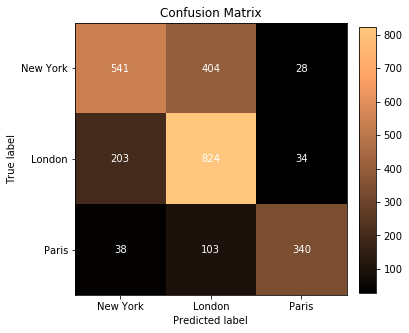

In [49]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(test_labels, predictions)
print(c_matrix)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
cax = fig.add_axes([0.77, 0.13, 0.03, 0.74])
im = ax.imshow(c_matrix, cmap="copper")
ax.set_xticks([0,1,2])
ax.set_xticklabels(['New York', 'London', 'Paris'])
ax.set_ylabel("True label")
ax.set_yticks([0,1,2])
ax.set_yticklabels(['New York', 'London', 'Paris'])
ax.set_xlabel("Predicted label")
ax.set_title("Confusion Matrix")
fig.colorbar(im, cax=cax, orientation='vertical')
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, c_matrix[i, j],
                       ha="center", va="center", color="w")

In [57]:
#Test your own tweet
tweet = "Le codage est amusant"
tweet_counts = counter.transform([tweet])
print(classifier.predict(tweet_counts))

tweet = "Coding is fun"
tweet_counts = counter.transform([tweet])
print(classifier.predict(tweet_counts))

[2]
[1]
